<img align="right" src="https://ds-cs-images.s3.ap-northeast-2.amazonaws.com/Codestates_Fulllogo_Color.png" width=100>

## *DATA SCIENCE / SECTION 2 / SPRINT 3 / NOTE 4*

# 📝 Assignment
---

# Interpreting ML Model

### 1) PDP를 만들어 모델을 설명하세요
- 한 특성에 대한 PDP를 만들고 모델을 설명하세요
- 두 특성간 관계에 대한 PDP를 만들고 모델을 설명하세요
- **(제출폼 과제)Boston 데이터의 train 데이터를 사용해 PDP plots을 그린 후, 집값에 대해 상대적으로 양의 선형관계를 나타내는 특성의 번호를 과제 제출폼에 제출하세요.**
    - 1. LSTAT
    - 2. CRIM
    - 3. NOX
    - 4. RM


In [ ]:
### 이곳에서 과제를 진행해 주세요 ### 

In [1]:
### (제출폼 과제) 이곳에서 과제를 진행해 주세요 ###
import sklearn
import xgboost
import shap
from sklearn.model_selection import train_test_split

shap.initjs();

df, target = shap.datasets.boston()
X_train,X_test,y_train,y_test = train_test_split(df, target, test_size=0.2, random_state=2)

model = xgboost.XGBRegressor().fit(X_train, y_train)

In [2]:
# dpi(dots per inch) 수치를 조정해 이미지 화질 조정
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 144

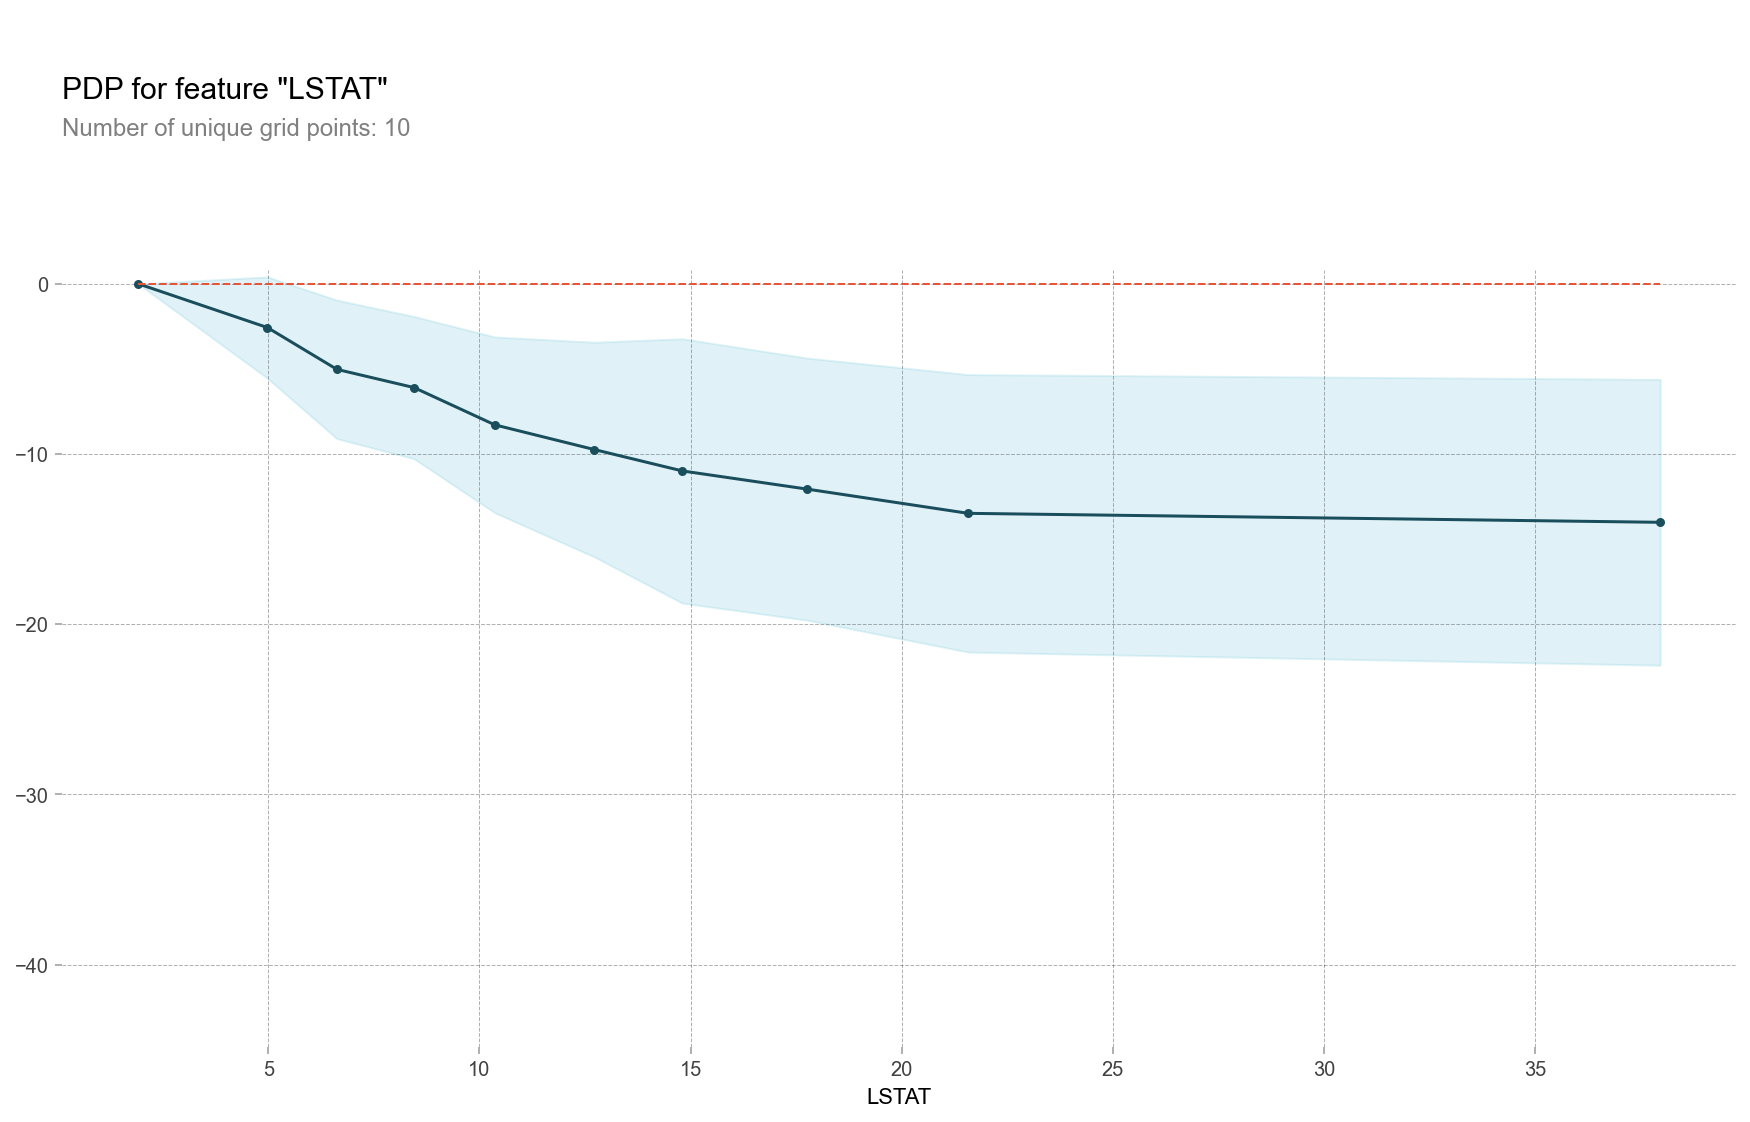

In [3]:
# 1개의 특성만을 사용하여 그래프를 그려보기
from pdpbox.pdp import pdp_isolate, pdp_plot
from sklearn.metrics import r2_score

# 1. LSTAT 
feature = 'LSTAT'

# PDP plots
isolated = pdp_isolate(
    model=model, 
    dataset=X_train, 
    model_features=X_train.columns, 
    feature=feature
)

pdp_plot(isolated, feature_name=feature);

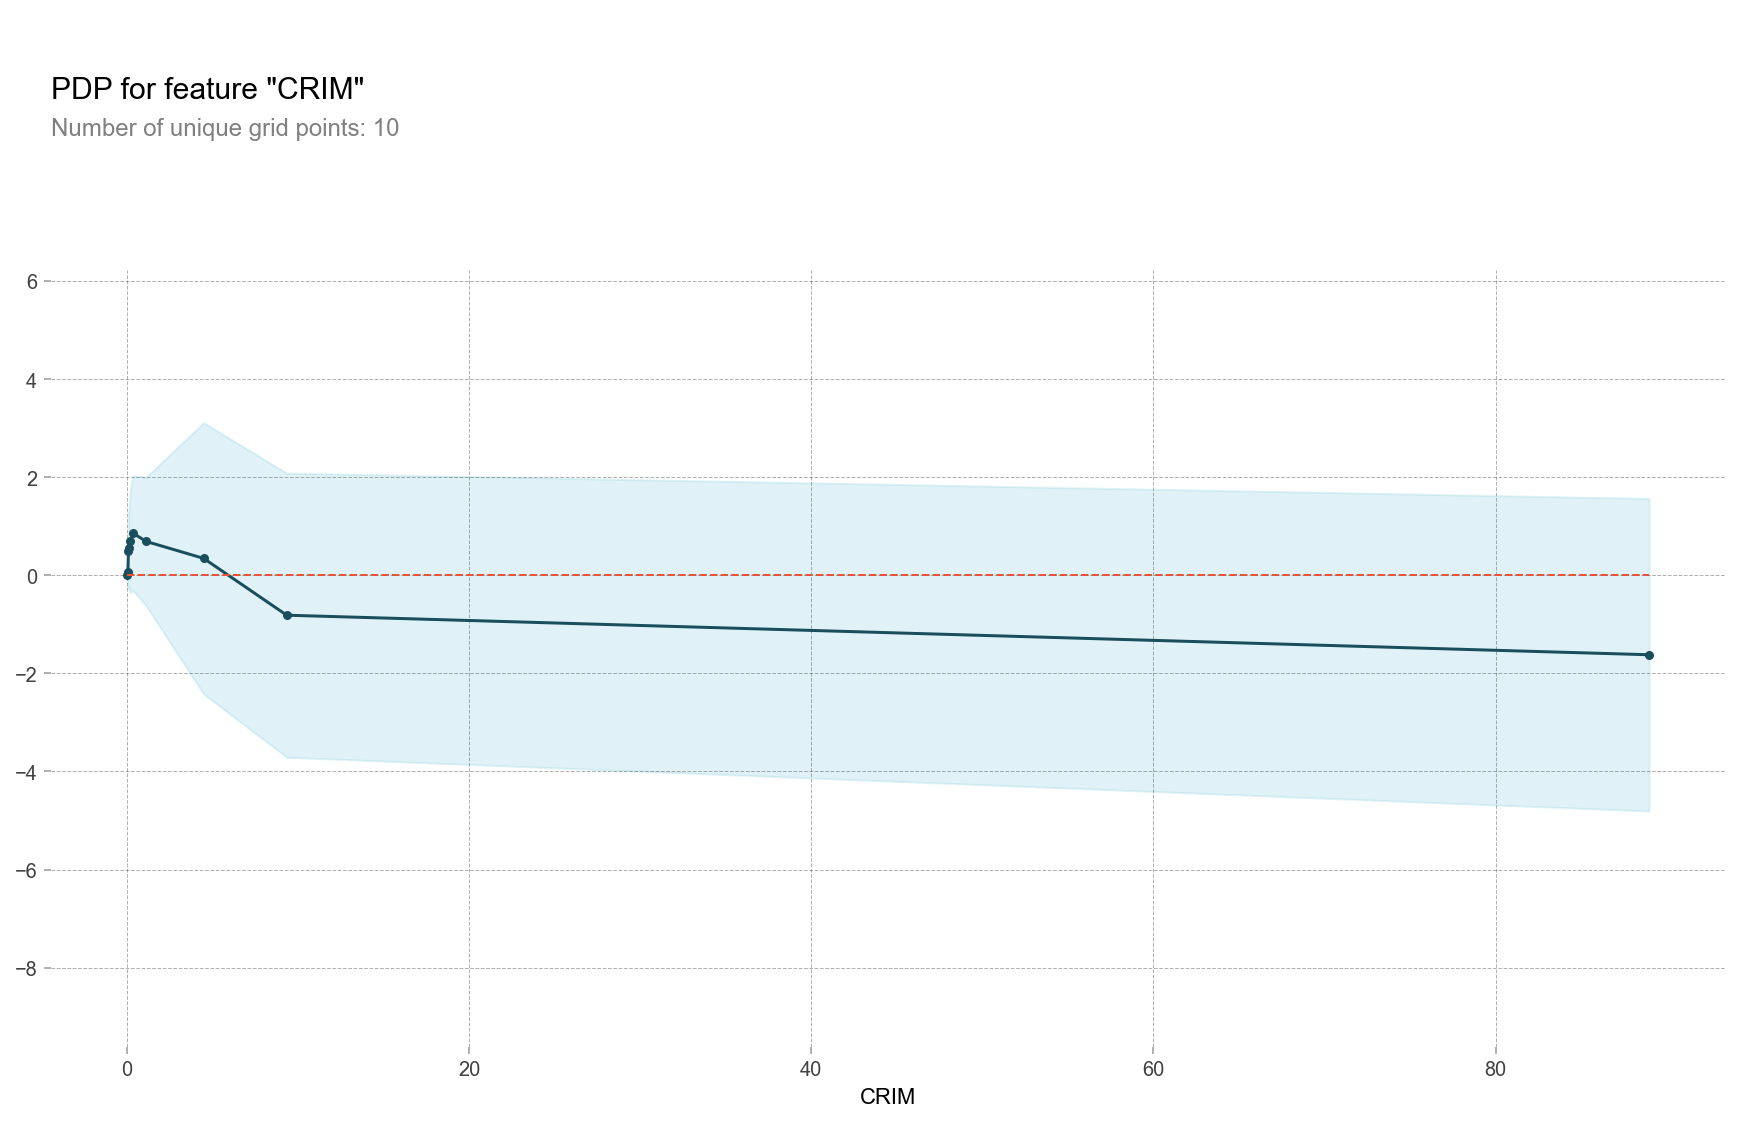

In [4]:
# 2. CRIM 
feature = 'CRIM'

# PDP plots
isolated = pdp_isolate(
    model=model, 
    dataset=X_train, 
    model_features=X_train.columns, 
    feature=feature
)


pdp_plot(isolated, feature_name=feature);

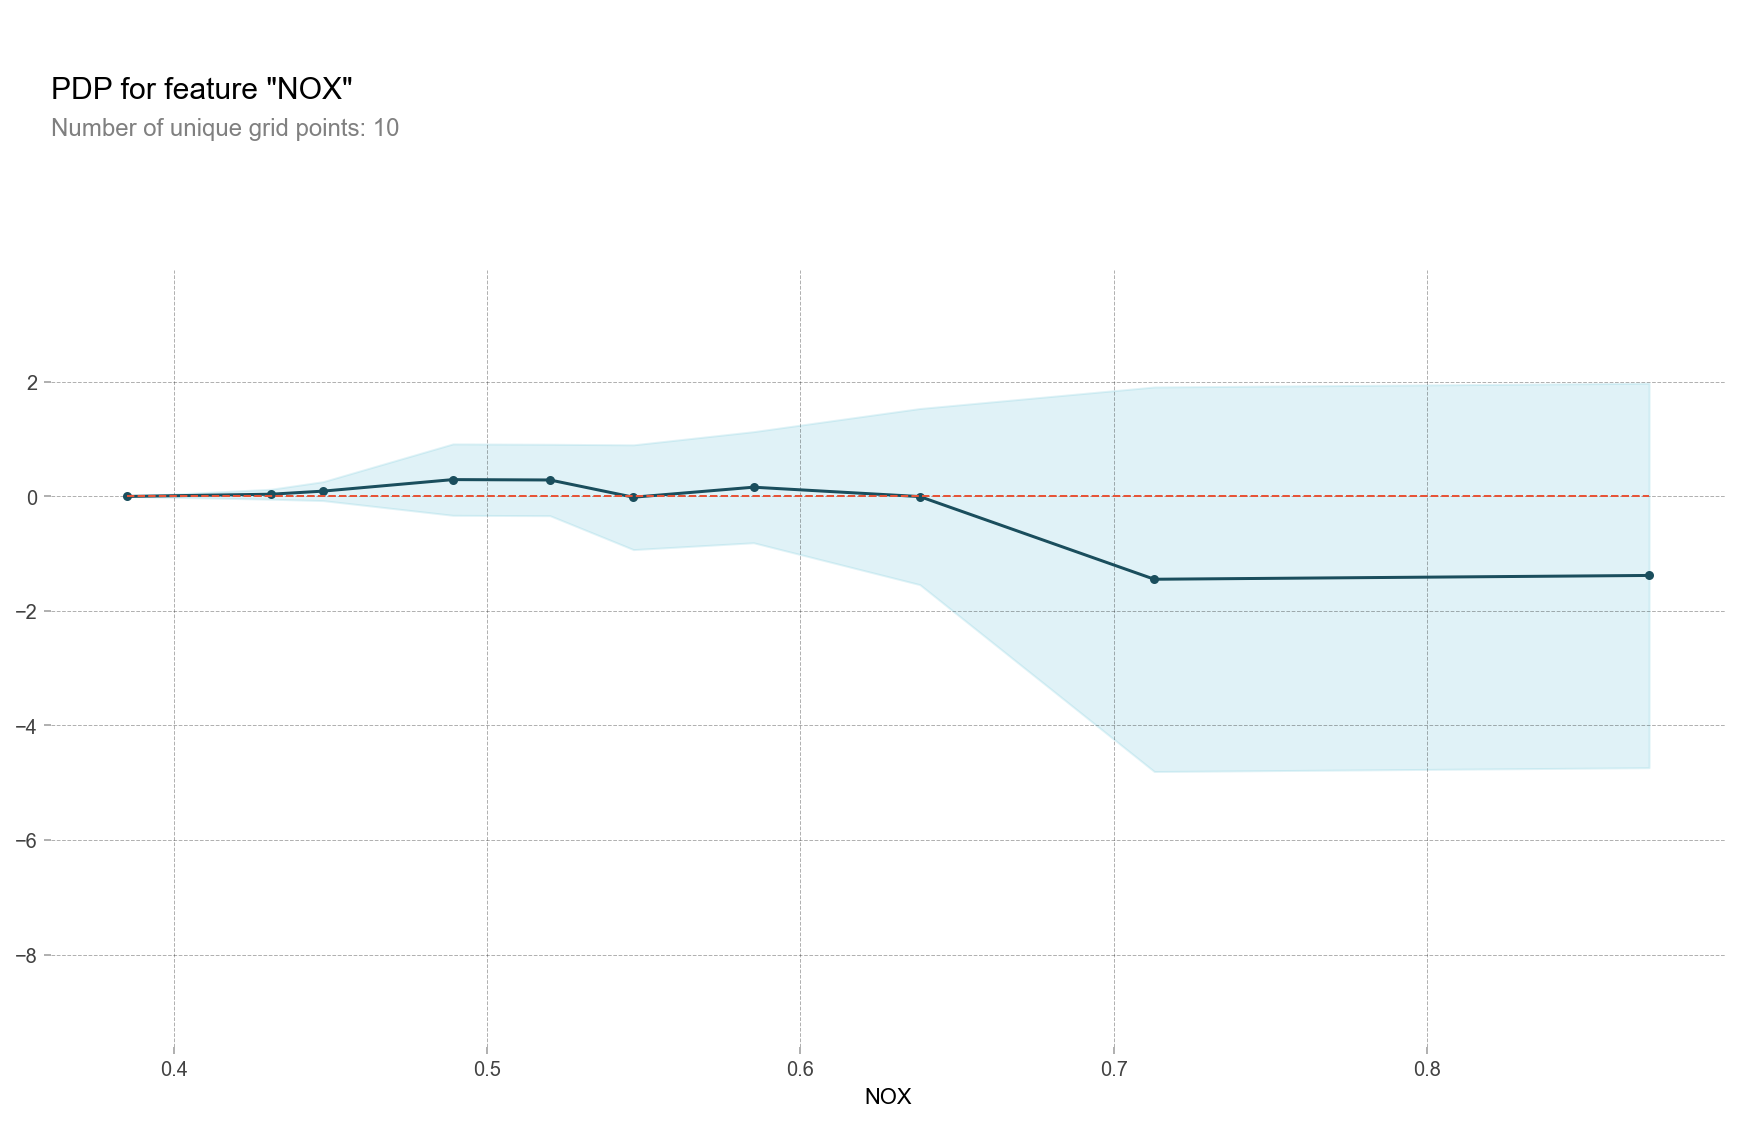

In [5]:
# 3. NOX
feature = 'NOX'

# PDP plots
isolated = pdp_isolate(
    model=model, 
    dataset=X_train, 
    model_features=X_train.columns, 
    feature=feature
)


pdp_plot(isolated, feature_name=feature);

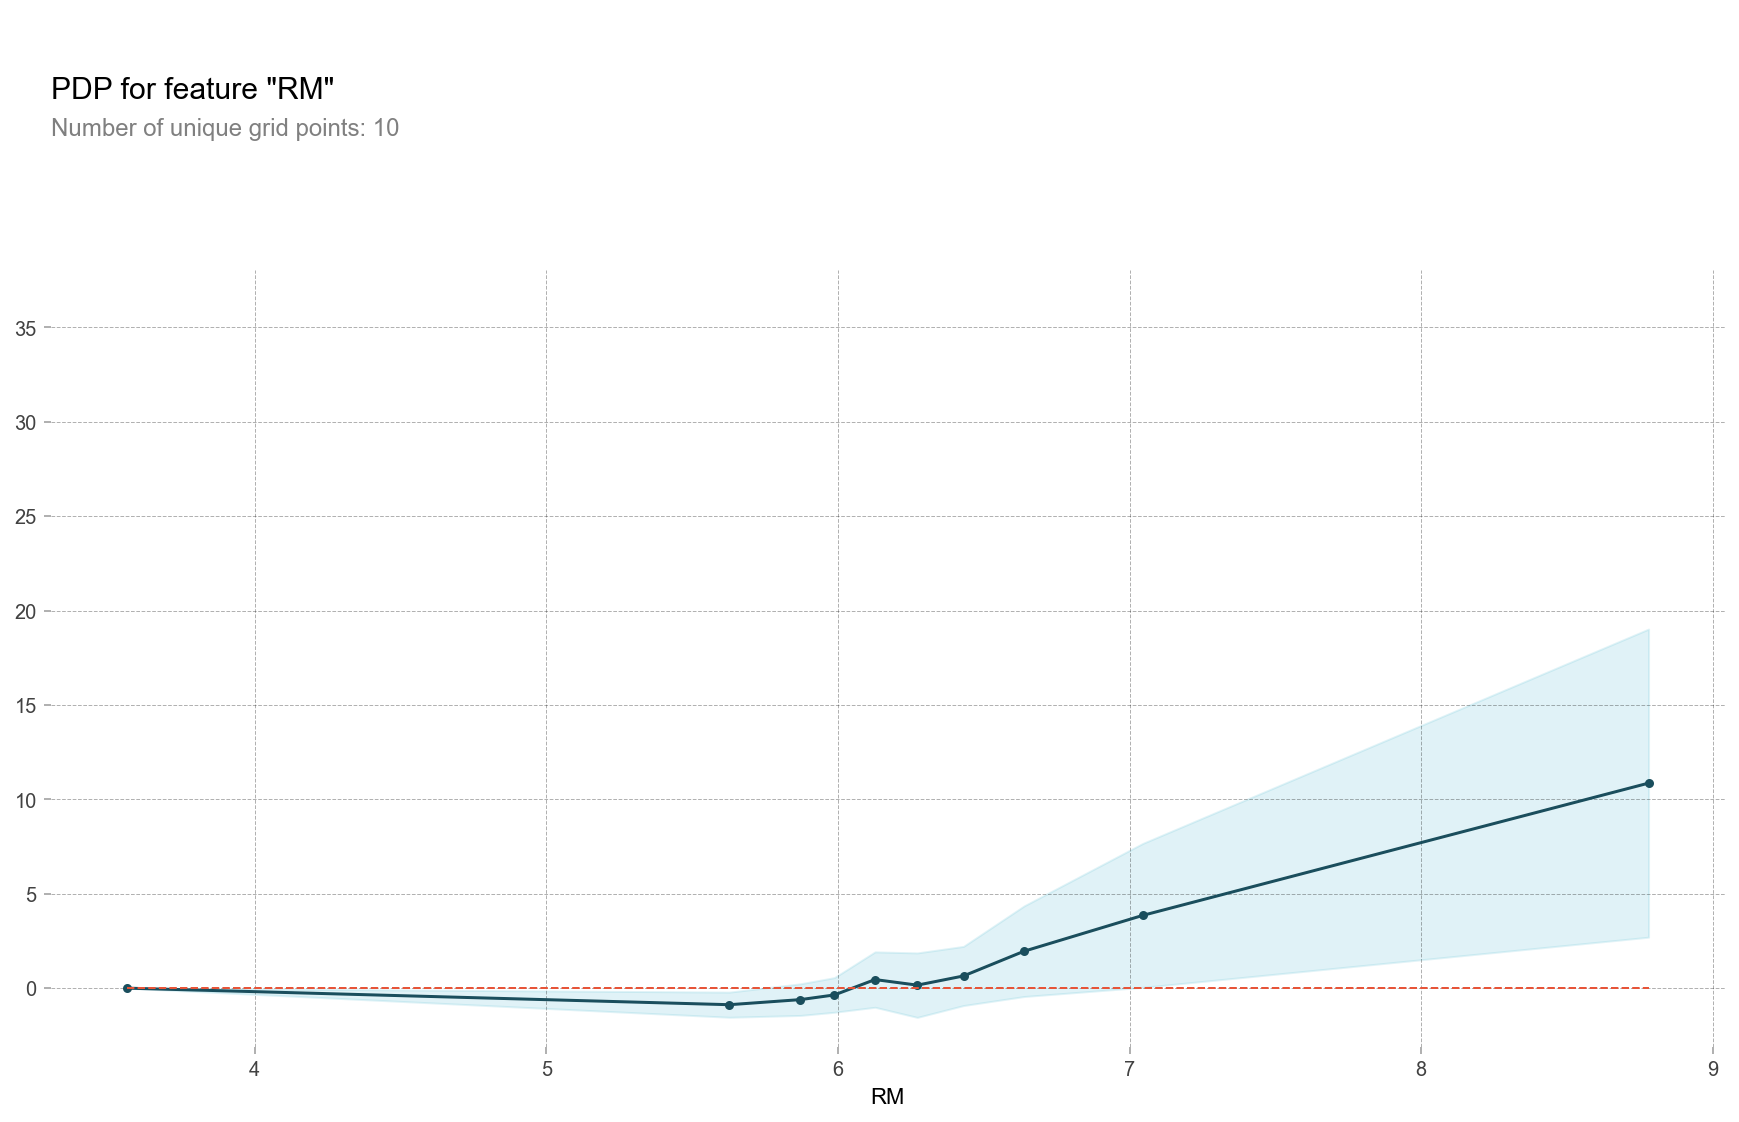

In [6]:
# 4. RM
feature = 'RM'

# PDP plots
isolated = pdp_isolate(
    model=model, 
    dataset=X_train, 
    model_features=X_train.columns, 
    feature=feature
)


pdp_plot(isolated, feature_name=feature);

### 2) SHAP 라이브러리를 사용해 최소 3개 이상 시각화를 하고 분석하세요
- 본인 포트폴리오 데이터를 사용해서 SHAP 시각화를 수행하세요
- **(제출폼 과제) SHAP 라이브러리를 사용해 다음 문항 중 설명이 올바른 항목을 선택한 후 과제 제출폼에 제출하세요.**
    - 1. force_plot을 그려보면 CRIM은 항상 가격을 낮추는 영향을 준다.
    - 2. SHAP의 summary_plot을 사용하면 permutation importance를 구할 수 있다.
    - 3. SHAP summary_plot을 그려보면 (조건: X_train, plot_type='bar') LSTAT이 가장 영향력이 큰 특성으로 보인다.
    - 4. 모델의 feature importance를 구하면 가장 영향력이 큰 특성이 LSTAT임을 알 수있다.**


In [7]:
### 이곳에서 과제를 진행해 주세요 ###

In [8]:
### (제출폼 과제) 이곳에서 과제를 진행해 주세요 ###
explainer = shap.TreeExplainer(model)

### Draw SHAP plots ###

In [9]:
# force plot이 잘 그려지는 지 확인하기

# test dataset의 2번째 데이터로 확인
row = X_test.iloc[[1]]
y_test[1]

model.predict(row)

import shap

explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(row)

shap.force_plot(
    base_value=explainer.expected_value, 
    shap_values=shap_values,
    features=row
)

In [29]:
# 나머지 전부 확인
# 1. force plot
shap_values = explainer.shap_values(X_train)
shap.force_plot(explainer.expected_value, shap_values, X_train)

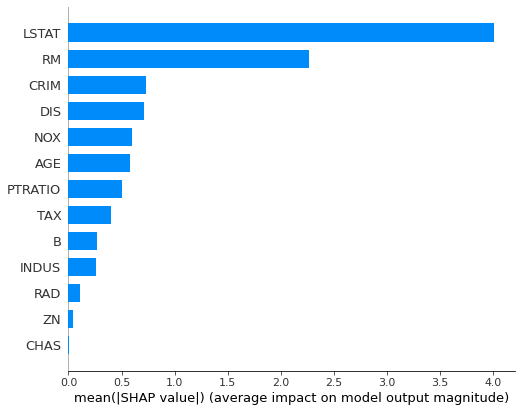

In [30]:
# summary plot
shap_values = explainer.shap_values(X_train)
shap.summary_plot(shap_values, X_train, plot_type='bar')

In [31]:
# permutation importance
import eli5
from eli5.sklearn import PermutationImportance

permuter = PermutationImportance(
    model,
    scoring='neg_mean_absolute_error', 
    n_iter=5,
    random_state=2
)

permuter.fit(X_train, y_train);

import pandas as pd
feature_names = X_train.columns.tolist()

eli5.show_weights(
    permuter, 
    top=None,
    feature_names=feature_names
)

Weight,Feature
4.9692 ± 0.5954,LSTAT
3.0681 ± 0.1808,RM
1.4107 ± 0.0399,DIS
1.3274 ± 0.0704,AGE
1.2434 ± 0.0929,NOX
1.1851 ± 0.0684,CRIM
0.8059 ± 0.0791,PTRATIO
0.6072 ± 0.0611,TAX
0.5840 ± 0.0371,INDUS
0.4987 ± 0.0199,B


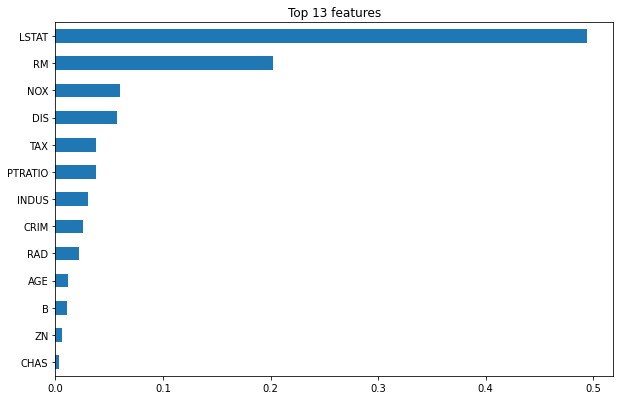

In [38]:
# feature importance
importances = pd.Series(model.feature_importances_, X_train.columns)

%matplotlib inline
import matplotlib.pyplot as plt

n = 13
plt.figure(figsize=(10,n/2))
plt.title(f'Top {n} features')
importances.sort_values()[-n:].plot.barh();